In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import mplhep as hep
from coffea.util import load
from coffea.hist import plot


In [29]:
output = load('hists_ttcom_dummy_sample.coffea')

btagCMVA btagCSVV2
btagDeepB btagDeepC
btagDeepFlavB btagDeepFlavC
DeepCSV_trackDecayLenVal_0 DeepCSV_trackDecayLenVal_1
DeepCSV_trackDecayLenVal_2 DeepCSV_trackDecayLenVal_3
DeepCSV_trackDecayLenVal_4 DeepCSV_trackDecayLenVal_5
DeepCSV_trackDeltaR_0 DeepCSV_trackDeltaR_1
DeepCSV_trackDeltaR_2 DeepCSV_trackDeltaR_3
DeepCSV_trackDeltaR_4 DeepCSV_trackDeltaR_5
njet nbjet
nel nmu
lelpt lmupt
ljpt sljpt


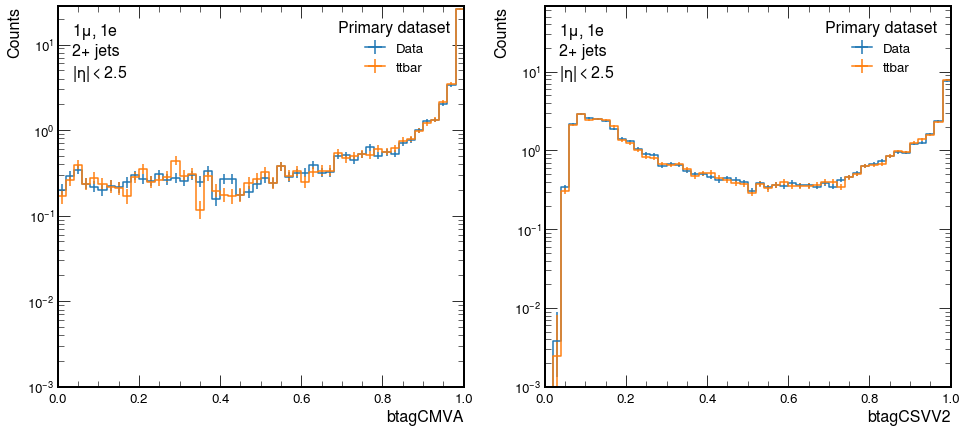

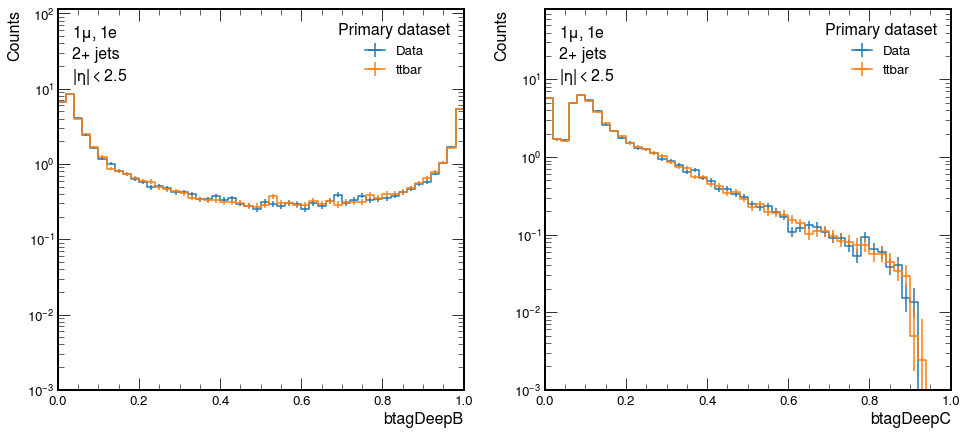

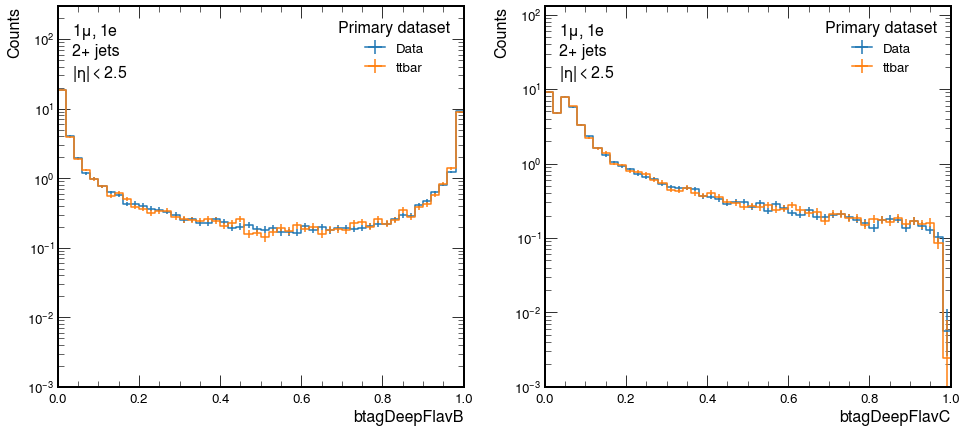

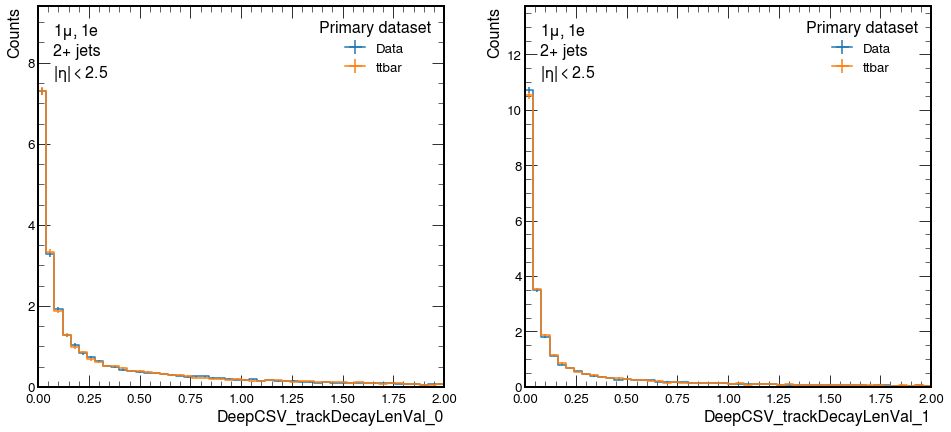

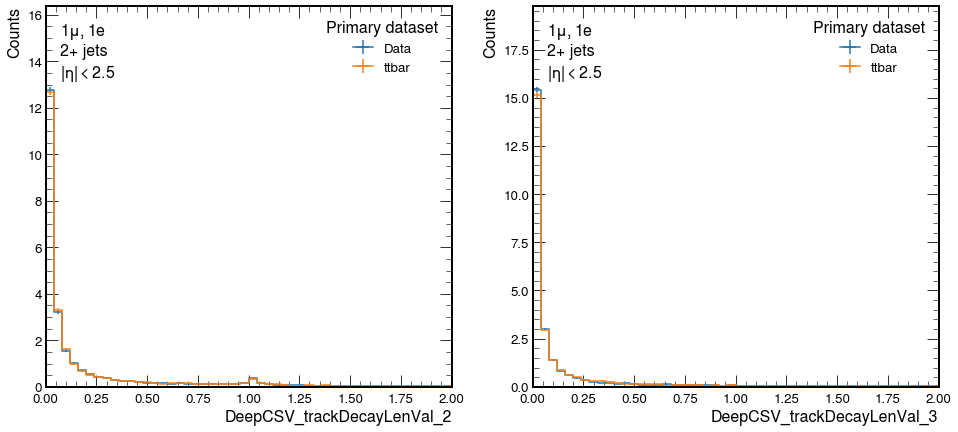

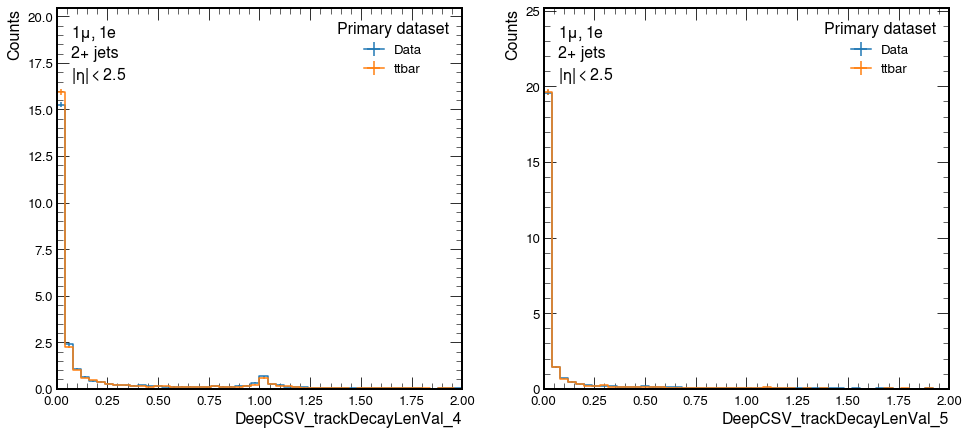

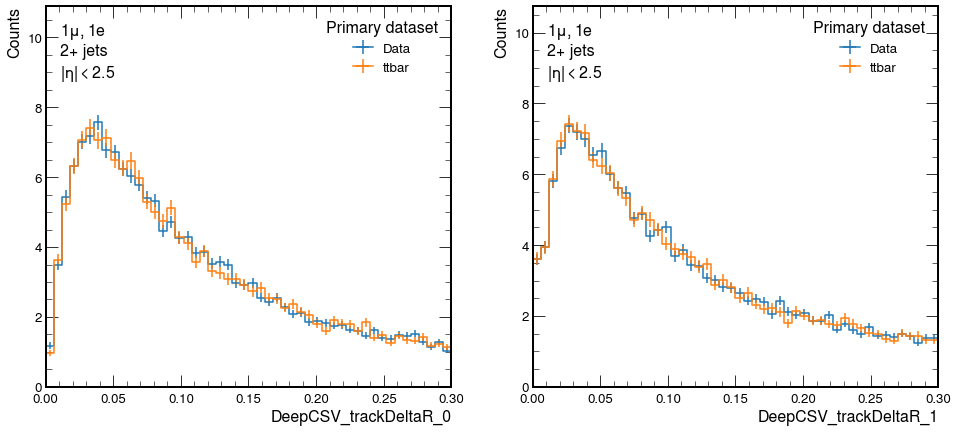

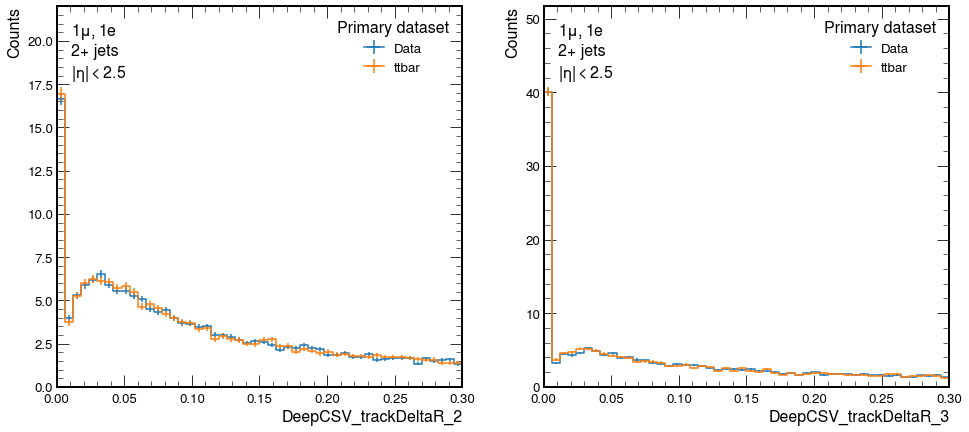

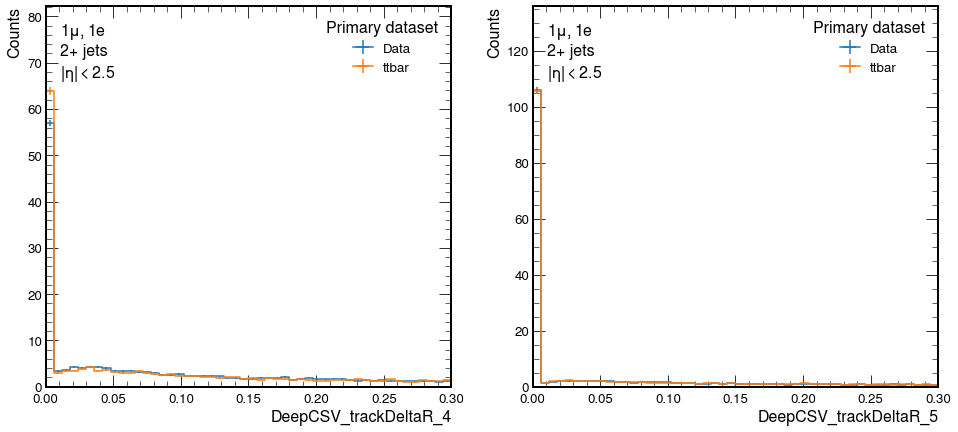

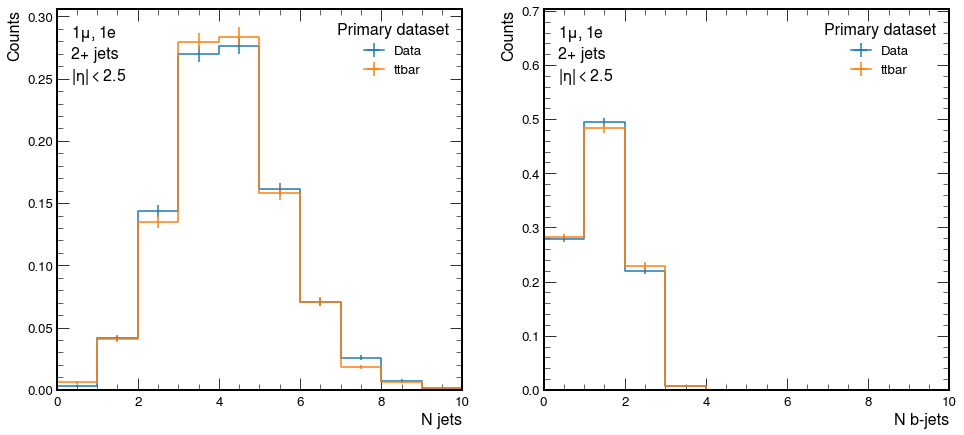

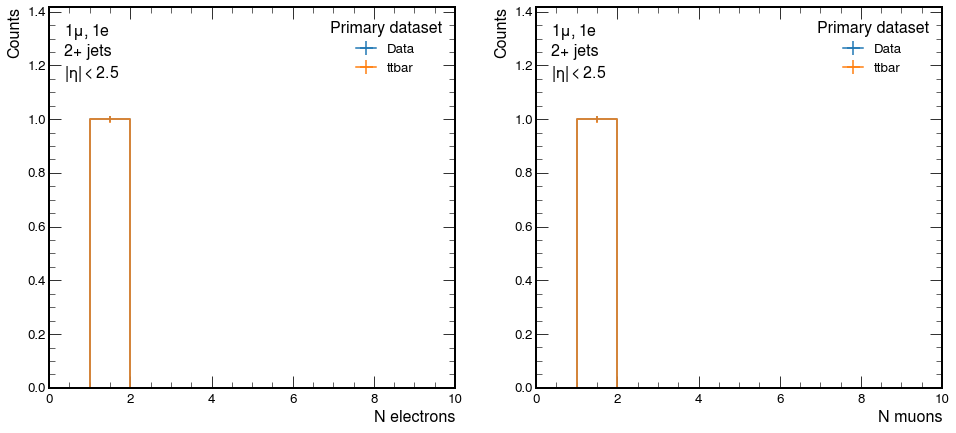

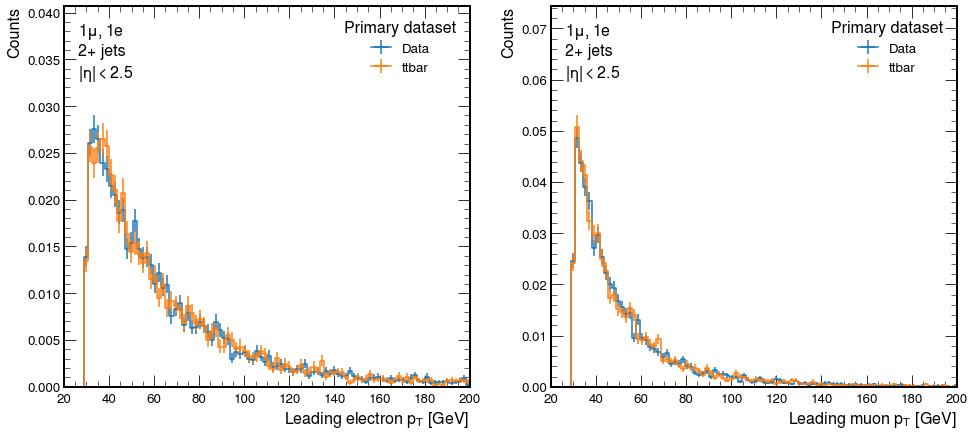

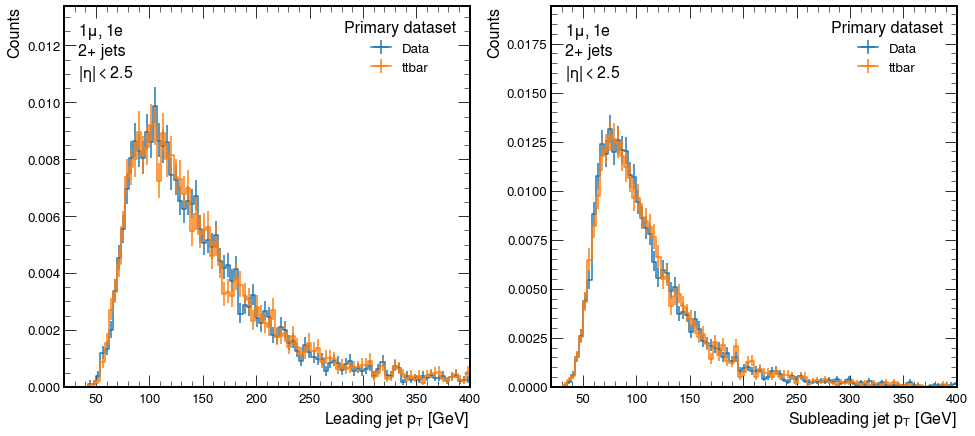

In [30]:
plt.style.use([hep.style.ROOT, {'font.size': 16}])

for i in range(0, int(round(len(output.keys())))-1, 2)[2:]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    h1name = list(output.keys())[i]
    h2name = list(output.keys())[i+1]
    if any([h1name.startswith('cutflow'), h2name.startswith('cutflow')]): break
    print(h1name, h2name)
    h1 = output[h1name]
    h2 = output[h2name]
    dense = True
    
    for ax, h in zip([ax1, ax2], [h1, h2]):
        if hasattr(h, 'dim'):
            plot.plot1d(h, ax=ax, legend_opts={'loc':1}, density=dense);
        else:
            continue    
        #break
    for ax, hname in zip([ax1, ax2], [h1name, h2name]):
        at = AnchoredText(r"$1\mu, 1e$"+"\n"+
                           "2+ jets"+"\n"+
                          r"$|\eta| < 2.5$",
                           loc=2, frameon=False)
        ax.add_artist(at)
        if hname.startswith("btag"):
            ax.semilogy()
        ax.set_ylim(0.001, None)
    hep.mpl_magic(ax1)
    hep.mpl_magic(ax2)